In [67]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as py
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import sklearn
from sklearn import ensemble
from sklearn import linear_model
#import scipy.stats as scipy
import scipy

# Import Raw Data

In [2]:
df = pd.read_json('/Users/alexanderdowney/Downloads/winemag-data_first150k.json')

In [3]:
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,None,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,None,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,None,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


# Clean the Data

In [4]:
size = []
size.append(len(df))
df = df[np.isfinite(df['price'])]
size.append(len(df))
df = df[np.isfinite(df['points'])]
size.append(len(df))

countries = df['country'].unique()
country_count=[]
countries_kept = []
for i in range(0,len(countries)):
    country_count.append(len(df.loc[df['country'] == countries[i]]))
for j in range(0,len(countries)):
    if country_count[j]>150:
        countries_kept.append(countries[j])
df = df[df['country'].isin(countries_kept)]
size.append(len(df))

amount_of_varieties = len(df['variety'].unique())
varietal = df['variety'].unique()
varietals = []
amount_of_each_variety = []
Tol = 15
for i in range(0,amount_of_varieties):
    if len(df.loc[df['variety'] == varietal[i]]) > Tol:
        amount_of_each_variety.append(len(df.loc[df['variety'] == varietal[i]]))
        varietals.append(varietal[i])
df = df[df['variety'].isin(varietals)]
size.append(len(df))

regions = df['region_1'].unique()
region_count=[]
regions_kept = []
for i in range(0,len(regions)):
    region_count.append(len(df.loc[df['region_1'] == regions[i]]))
for j in range(0,len(regions)):
    if region_count[j]>10:
        regions_kept.append(regions[j])
df = df[df['region_1'].isin(regions_kept)]
size.append(len(df))
size

[150930, 137235, 137235, 136334, 134711, 111009]

# This is the final dataset!

In [5]:
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,None,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,None,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,None,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


# Useful Functions

In [6]:
def R2_score(y_pred,y_true):
    # u is the residual sum of squares
    u = ((y_true - y_pred) ** 2).sum()
    # v is the total sum of squares
    v = ((y_true - y_true.mean()) ** 2).sum()
    return (1-u/v)

In [7]:
def report_metrics(y_pred, y_true):
    m1 = metrics.mean_absolute_error(y_true, y_pred)
    m2 = metrics.median_absolute_error(y_true,y_pred)
    m3 = metrics.explained_variance_score(y_true,y_pred)
    m4 = metrics.r2_score(y_true,y_pred)
    #print("Mean Absolute Error:",m1,"| Median Absolute Error:", m2,"| Explain Variance Score:", m3,"| R2 Score:",m4)
    return m1,m2,m3,m4

In [8]:
def Transform_df_to_X(df):
    # To get variety data via one hot encoding
    varieties_kpt = df['variety'].unique()
    dummy_variety = pd.get_dummies(df['variety'])
    variety = []
    for i in range(0,len(df['variety'].unique())):
        variety.append(dummy_variety[varieties_kpt[i]])
        
    # To get country data via one hot encoding
    countries_kpt = df['country'].unique()
    dummy = pd.get_dummies(df['country'])
    country = []
    for i in range(0,len(df['country'].unique())):
        country.append(dummy[countries_kpt[i]])
        
    # To get variety data via one hot encoding
    regions_kpt = df['region_1'].unique()
    dummy_variety = pd.get_dummies(df['region_1'])
    region = []
    for i in range(0,len(df['region_1'].unique())):
        region.append(dummy_variety[regions_kpt[i]])
        
    X = df[['points']].as_matrix()

    for i in range(0,len(country)):
        X = np.c_[X,country[i]]
    for j in range(0,len(variety)):
        X = np.c_[X,variety[j]]
    for j in range(0,len(region)):
        X = np.c_[X,region[j]]
    X = np.c_[X,sent_sums]
    X = np.c_[X,sent_prob]
#    X = np.c_[X,sent_neg]
    X = np.c_[X,np.ones(len(df['points']))]
    return X

# Linear Models

In [36]:
def Wine_LinLstSq_Regression(Xtrain,Xtest,Ytrain):
    w,resdiuals,rank,singular_vals = np.linalg.lstsq(Xtrain, Ytrain)
    w_matrix = np.transpose(np.asmatrix(w))
    y_pred = np.squeeze(np.asarray(Xtest*w_matrix))
    return y_pred # Returns the prediction vector

In [10]:
def Wine_Huber_Linear_Regression(Xtrain, Xtest, Ytrain):
    hlr = sklearn.linear_model.HuberRegressor()
    hlr = hlr.fit(Xtrain, Ytrain)
    return hlr.predict(Xtest)

# Trees

In [11]:
def Wine_Decision_Tree_Regression(Xtrain,Xtest,Ytrain):
    clf = tree.DecisionTreeRegressor()
    # useful code: min_samples_leaf=10,max_depth=3,max_leaf_nodes = 100
    clf = clf.fit(Xtrain, Ytrain)
    return clf.predict(Xtest) # Returns the prediction vector

In [12]:
def Wine_Random_Forest_Regression(Xtrain, Xtest, Ytrain):
    rfr = sklearn.ensemble.RandomForestRegressor()
    rfr = rfr.fit(Xtrain, Ytrain)
    return rfr.predict(Xtest)

In [13]:
def Wine_Huber_Tree_Regression(Xtrain, Xtest, Ytrain):
    htr = sklearn.ensemble.GradientBoostingRegressor(loss='huber')
    htr = htr.fit(Xtrain, Ytrain)
    return htr.predict(Xtest)

In [14]:
def Wine_Ls_Tree_Regression(Xtrain, Xtest, Ytrain):
    htr = sklearn.ensemble.GradientBoostingRegressor(loss='ls')
    htr = htr.fit(Xtrain, Ytrain)
    return htr.predict(Xtest)

# SVM

In [15]:
def Wine_SVM_Regression(Xtrain, Xtest, Ytrain):
    svr = sklearn.svm.SVR()
    svr = svr.fit(Xtrain, Ytrain)
    return svr.predict(Xtest)

# Train/Test Set Split

In [16]:
sent_sums = pd.read_json('/Users/alexanderdowney/Downloads/sentiment_sums.json')
sent_prob = pd.read_json('/Users/alexanderdowney/Downloads/sentiment_probabilities.json')
sent_neg = pd.read_json('/Users/alexanderdowney/Downloads/sentiment_probabilities_negative.json')

In [17]:
X = Transform_df_to_X(df)
data = X
target = df['price'].as_matrix()

In [18]:
# total examples after data cleaning: 129964
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

# Example on Split data

In [19]:
report_metrics((Wine_Decision_Tree_Regression(X_train,X_test,y_train)),y_test)

(6.8809393717804861, 0.0, 0.61174992571392273, 0.61174614048452058)

# Exploratory Data Analysis

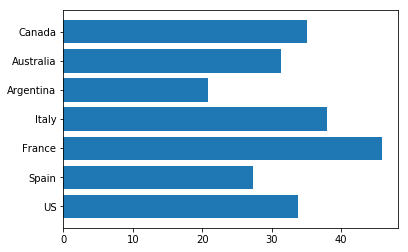

In [77]:
Average_Price_Per_Region=[]
for i in range(0,len(df['country'].unique())):
    Average_Price_Per_Region.append(np.mean(df.loc[df['country'] == df['country'].unique()[i]]['price']))

y_pos = np.arange(len(Average_Price_Per_Region))
py.barh(y_pos, Average_Price_Per_Region, align='center')
py.yticks(y_pos, df['country'].unique())
py.show()

# Graphs for Linear Regression

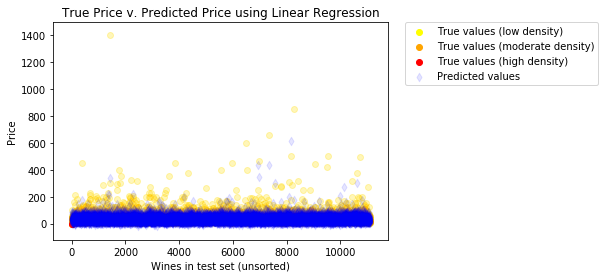

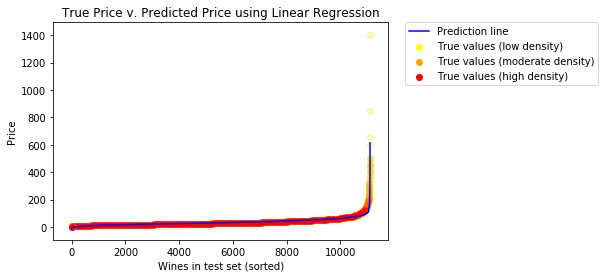

In [106]:
y_pred = Wine_LinLstSq_Regression(X_train,X_test,y_train)

py.scatter(np.arange(len(y_test)),(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.scatter(np.arange(len(y_test)),y_pred,alpha=0.1,color='blue',marker="d",label='Predicted values')
py.xlabel("Wines in test set (unsorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Linear Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.plot(np.arange(len(y_test)),np.sort(y_pred),'b',label='Prediction line')
py.xlabel("Wines in test set (sorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Linear Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

# Graphs for Huber Regression

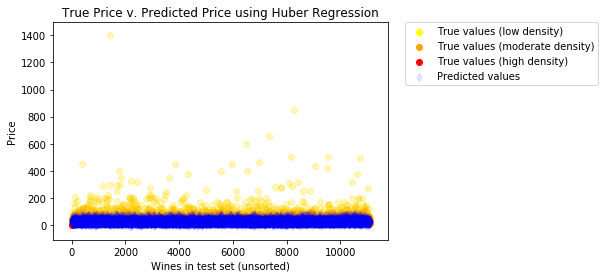

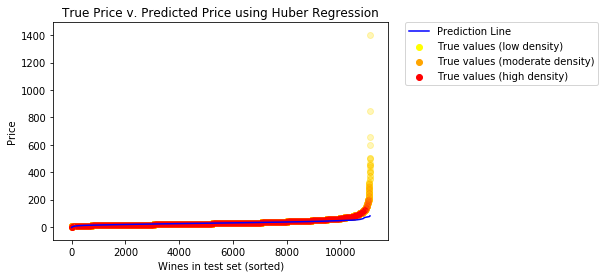

In [107]:
y_pred = Wine_Huber_Linear_Regression(X_train,X_test,y_train)

py.scatter(np.arange(len(y_test)),(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.scatter(np.arange(len(y_test)),y_pred,alpha=0.1,color='blue',marker="d",label='Predicted values')
py.xlabel("Wines in test set (unsorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Huber Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.plot(np.arange(len(y_test)),np.sort(y_pred),'b',label='Prediction Line')
py.xlabel("Wines in test set (sorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Huber Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

# Graphs for Decision Trees

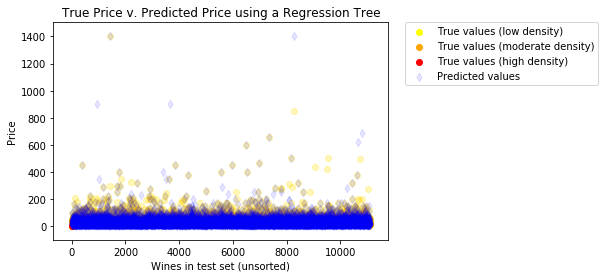

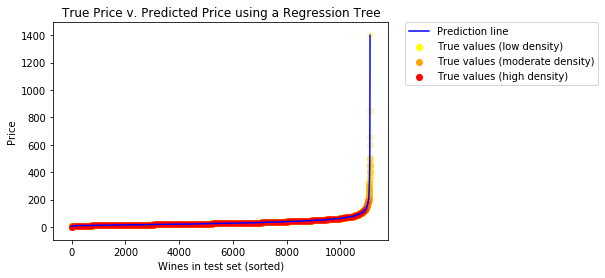

In [108]:
y_pred = Wine_Decision_Tree_Regression(X_train,X_test,y_train)

py.scatter(np.arange(len(y_test)),(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.scatter(np.arange(len(y_test)),y_pred,alpha=0.1,color='blue',marker="d",label='Predicted values')
py.xlabel("Wines in test set (unsorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using a Regression Tree")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.plot(np.arange(len(y_test)),np.sort(y_pred),'b',label='Prediction line')
py.xlabel("Wines in test set (sorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using a Regression Tree")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

# Graphs for Random Forest

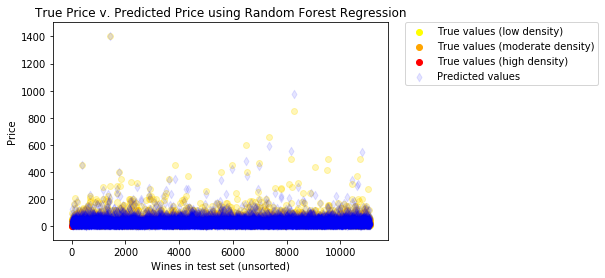

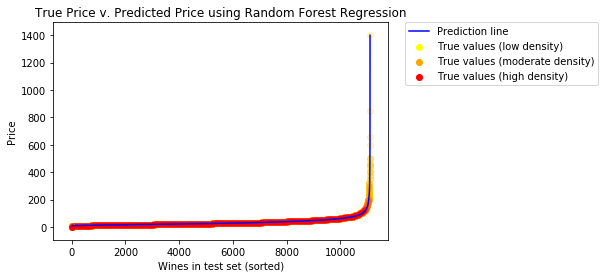

In [109]:
y_pred = Wine_Random_Forest_Regression(X_train,X_test,y_train)

py.scatter(np.arange(len(y_test)),(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.scatter(np.arange(len(y_test)),y_pred,alpha=0.1,color='blue',marker="d",label='Predicted values')
py.xlabel("Wines in test set (unsorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Random Forest Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.plot(np.arange(len(y_test)),np.sort(y_pred),'b',label='Prediction line')
py.xlabel("Wines in test set (sorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Random Forest Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

# Graphs for Gradient Boosting Regression with Huber Loss

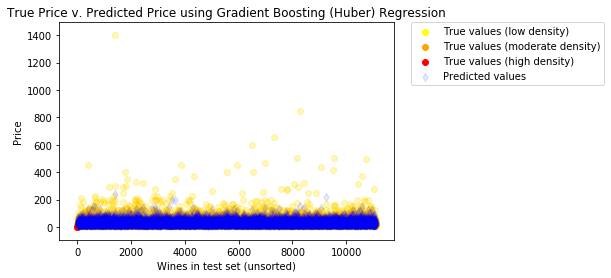

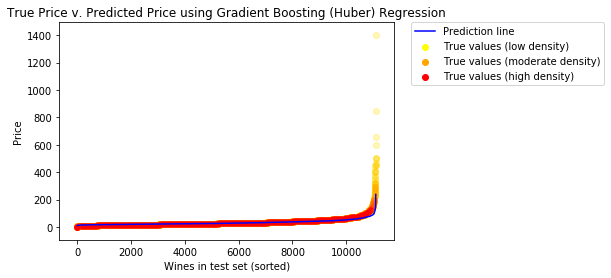

In [139]:
y_pred = Wine_Huber_Tree_Regression(X_train,X_test,y_train)

py.scatter(np.arange(len(y_test)),(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.scatter(np.arange(len(y_test)),y_pred,alpha=0.1,color='blue',marker="d",label='Predicted values')
py.xlabel("Wines in test set (unsorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Gradient Boosting (Huber) Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.plot(np.arange(len(y_test)),np.sort(y_pred),'b',label='Prediction line')
py.xlabel("Wines in test set (sorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Gradient Boosting (Huber) Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

# Graphs for Gradient Boosting Regression with Least Squares Loss

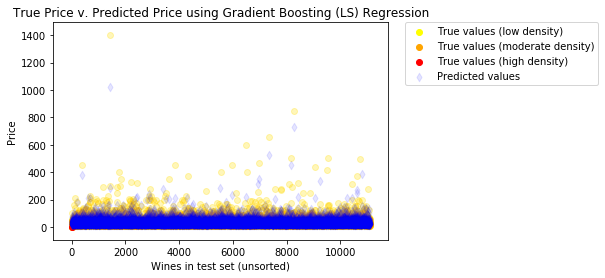

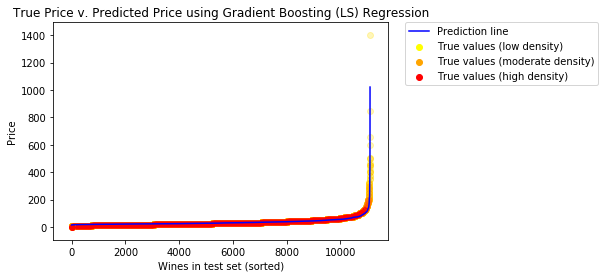

In [140]:
y_pred = Wine_Ls_Tree_Regression(X_train,X_test,y_train)

py.scatter(np.arange(len(y_test)),(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),y_test,alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.scatter(np.arange(len(y_test)),y_pred,alpha=0.1,color='blue',marker="d",label='Predicted values')
py.xlabel("Wines in test set (unsorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Gradient Boosting (LS) Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.2,color='yellow')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.085,color='orange')
py.scatter(np.arange(len(y_test)),np.sort(y_test),alpha=0.002,color='red')
py.scatter([0],[0],alpha=1,color='yellow',label='True values (low density)')
py.scatter([0],[0],alpha=1,color='orange',label='True values (moderate density)')
py.scatter([0],[0],alpha=1,color='red',label='True values (high density)')
py.plot(np.arange(len(y_test)),np.sort(y_pred),'b',label='Prediction line')
py.xlabel("Wines in test set (sorted)")
py.ylabel("Price")
py.title("True Price v. Predicted Price using Gradient Boosting (LS) Regression")
py.legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
py.show()

# Cross Validation 

In [20]:
def test_cv(model):
    scores_m1 = []
    scores_m2 = []
    scores_m3 = []
    scores_m4 = []
    for k in range(0, 10):
        X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.1, random_state=k)
        train_data_input = X_tr
        train_data_output = y_tr
        test_data_input = X_te
        y_pred = model(train_data_input, test_data_input, train_data_output)
        m1,m2,m3,m4 = report_metrics(y_pred, y_te)
        scores_m1.append(m1)
        scores_m2.append(m2)
        scores_m3.append(m3)
        scores_m4.append(m4)
        print("Mean Absolute Error:",m1,"| Median Absolute Error:", m2,"| Explain Variance Score:", m3,"| R2 Score:",m4)
    print("Average Mean Absolute Error:",np.mean(scores_m1),"| Average Median Absolute Error:", np.mean(scores_m2),"| Average Explain Variance Score:", np.mean(scores_m3),"| Average R2 Score:",np.mean(scores_m4))
    return np.mean(scores_m1),np.mean(scores_m2),np.mean(scores_m3),np.mean(scores_m4)

#### Linear Models

In [37]:
test_cv(Wine_LinLstSq_Regression)

Mean Absolute Error: 12.9735389994 | Median Absolute Error: 8.66415405273 | Explain Variance Score: 0.476835855615 | R2 Score: 0.476811452464
Mean Absolute Error: 13.250275208 | Median Absolute Error: 8.54401397705 | Explain Variance Score: 0.318380165639 | R2 Score: 0.31834254417
Mean Absolute Error: 13.0945050985 | Median Absolute Error: 8.49609375 | Explain Variance Score: 0.452292184453 | R2 Score: 0.45229213022
Mean Absolute Error: 13.1960096865 | Median Absolute Error: 8.61285191029 | Explain Variance Score: 0.45243181428 | R2 Score: 0.45242919124
Mean Absolute Error: 13.2159478382 | Median Absolute Error: 8.72802734375 | Explain Variance Score: 0.436457915892 | R2 Score: 0.436456386598
Mean Absolute Error: 13.4124130113 | Median Absolute Error: 8.73962783813 | Explain Variance Score: 0.331685958691 | R2 Score: 0.331677270726
Mean Absolute Error: 13.5225121196 | Median Absolute Error: 8.56985473633 | Explain Variance Score: 0.345822634124 | R2 Score: 0.345766186916
Mean Absolute 

(13.232432768659105,
 8.6652795605361455,
 0.40588877869601198,
 0.40586661108650246)

In [29]:
test_cv(Wine_Huber_Linear_Regression)

Mean Absolute Error: 13.0016234495 | Median Absolute Error: 7.25766125065 | Explain Variance Score: 0.274583514111 | R2 Score: 0.253611697029
Mean Absolute Error: 13.5180415633 | Median Absolute Error: 7.58478470976 | Explain Variance Score: 0.17517089832 | R2 Score: 0.158629446679
Mean Absolute Error: 14.0518032192 | Median Absolute Error: 7.91435457956 | Explain Variance Score: 0.190686359731 | R2 Score: 0.172380647125
Mean Absolute Error: 13.8325951055 | Median Absolute Error: 7.75800173918 | Explain Variance Score: 0.201993123822 | R2 Score: 0.180464608229
Mean Absolute Error: 14.2377195037 | Median Absolute Error: 8.31293787408 | Explain Variance Score: 0.188751196836 | R2 Score: 0.169699406806
Mean Absolute Error: 13.6056983022 | Median Absolute Error: 7.40874296041 | Explain Variance Score: 0.168630395255 | R2 Score: 0.155040572223
Mean Absolute Error: 13.8143215764 | Median Absolute Error: 7.27007645322 | Explain Variance Score: 0.165273907611 | R2 Score: 0.149616074434
Mean Ab

(13.59852707448681,
 7.556415026977005,
 0.20225474159067208,
 0.18416952373379589)

#### Trees

In [30]:
test_cv(Wine_Decision_Tree_Regression)

Mean Absolute Error: 7.50821582109 | Median Absolute Error: 0.0 | Explain Variance Score: 0.527751018668 | R2 Score: 0.527638755035
Mean Absolute Error: 7.46759094802 | Median Absolute Error: 0.0 | Explain Variance Score: 0.43360838298 | R2 Score: 0.433501160276
Mean Absolute Error: 7.45663739763 | Median Absolute Error: 0.0 | Explain Variance Score: 0.613946263 | R2 Score: 0.613923118647
Mean Absolute Error: 7.52404305469 | Median Absolute Error: 0.0 | Explain Variance Score: 0.611682163223 | R2 Score: 0.61156092602
Mean Absolute Error: 7.81367918982 | Median Absolute Error: 0.0 | Explain Variance Score: 0.540945973348 | R2 Score: 0.540931347849
Mean Absolute Error: 7.87889346999 | Median Absolute Error: 0.0 | Explain Variance Score: 0.406246765986 | R2 Score: 0.406064416693
Mean Absolute Error: 7.81547244096 | Median Absolute Error: 0.0 | Explain Variance Score: 0.509371454837 | R2 Score: 0.509194146095
Mean Absolute Error: 7.40407220339 | Median Absolute Error: 0.0 | Explain Varianc

(7.5954538605475506, 0.0, 0.51635721120813449, 0.51626564399981734)

In [31]:
test_cv(Wine_Random_Forest_Regression)

Mean Absolute Error: 7.96119800686 | Median Absolute Error: 3.2 | Explain Variance Score: 0.686377153584 | R2 Score: 0.686272008359
Mean Absolute Error: 8.16386764242 | Median Absolute Error: 3.4 | Explain Variance Score: 0.483125734369 | R2 Score: 0.483107021229
Mean Absolute Error: 8.06177626546 | Median Absolute Error: 3.4 | Explain Variance Score: 0.690232556741 | R2 Score: 0.690232436236
Mean Absolute Error: 8.17508848276 | Median Absolute Error: 3.4 | Explain Variance Score: 0.67626955224 | R2 Score: 0.676239368595
Mean Absolute Error: 8.08298441813 | Median Absolute Error: 3.3 | Explain Variance Score: 0.696593627715 | R2 Score: 0.696572813187
Mean Absolute Error: 8.40948305458 | Median Absolute Error: 3.3 | Explain Variance Score: 0.534220175179 | R2 Score: 0.53417355917
Mean Absolute Error: 8.51921388021 | Median Absolute Error: 3.4 | Explain Variance Score: 0.603045397271 | R2 Score: 0.602847306197
Mean Absolute Error: 8.01483626429 | Median Absolute Error: 3.35 | Explain Var

(8.1782768558127845, 3.335, 0.620936730958626, 0.62085847297268482)

In [25]:
test_cv(Wine_Huber_Tree_Regression)

Mean Absolute Error: 11.8909524527 | Median Absolute Error: 7.13958328486 | Explain Variance Score: 0.437676739122 | R2 Score: 0.429693905469
Mean Absolute Error: 12.0022839006 | Median Absolute Error: 7.14602482944 | Explain Variance Score: 0.314723344348 | R2 Score: 0.309546332065
Mean Absolute Error: 12.1776751218 | Median Absolute Error: 7.11219451507 | Explain Variance Score: 0.404379477603 | R2 Score: 0.396992240749
Mean Absolute Error: 12.1815368208 | Median Absolute Error: 7.19005517305 | Explain Variance Score: 0.419946649634 | R2 Score: 0.412797116087
Mean Absolute Error: 12.1025982815 | Median Absolute Error: 7.20074851457 | Explain Variance Score: 0.416631269889 | R2 Score: 0.409767018976
Mean Absolute Error: 12.3764467457 | Median Absolute Error: 7.0083968817 | Explain Variance Score: 0.2985902251 | R2 Score: 0.293311469997
Mean Absolute Error: 12.6838953471 | Median Absolute Error: 7.14905644846 | Explain Variance Score: 0.302245472281 | R2 Score: 0.295783885411
Mean Abso

(12.179752979197861,
 7.1542762921523746,
 0.37195836402417359,
 0.36529763284159544)

In [ ]:
test_cv(Wine_Ls_Tree_Regression)

Mean Absolute Error: 12.6069084395 | Median Absolute Error: 8.3775776029 | Explain Variance Score: 0.498341016203 | R2 Score: 0.49834100308
Mean Absolute Error: 12.8577605831 | Median Absolute Error: 8.28523332338 | Explain Variance Score: 0.349130162615 | R2 Score: 0.349078070901
Mean Absolute Error: 12.8349092024 | Median Absolute Error: 8.35447230921 | Explain Variance Score: 0.534898531561 | R2 Score: 0.534883486841
Mean Absolute Error: 12.7032311219 | Median Absolute Error: 8.4175363407 | Explain Variance Score: 0.600939913989 | R2 Score: 0.600939090883
Mean Absolute Error: 12.5583679333 | Median Absolute Error: 8.43650592027 | Explain Variance Score: 0.559020968383 | R2 Score: 0.559009822861
Mean Absolute Error: 13.0425675928 | Median Absolute Error: 8.3264262771 | Explain Variance Score: 0.438861147362 | R2 Score: 0.438859292018
Mean Absolute Error: 12.9037994754 | Median Absolute Error: 8.27871410765 | Explain Variance Score: 0.5206517908 | R2 Score: 0.520588262575
Mean Absolut

(12.764215985151571,
 8.3517430278845151,
 0.49300749837835001,
 0.49298561273978275)

# Test Set Performance

In [21]:
# input: model (function), test set (numpy matrix)
# output: absolute loss
def test_score(model):
    train_data_input = X_train
    train_data_output = y_train
    test_data_input = X_test
    y_pred = model(train_data_input, test_data_input, train_data_output)
    #for i in range(0,len(y_pred)):
    #print("Guess:",y_pred[i],"Actual:",y_train[i])
    #score = metrics.mean_absolute_error(y_test,y_pred)
    m1,m2,m3,m4 = report_metrics(y_pred, y_test)
    print("Mean Absolute Error:",m1,"| Median Absolute Error:", m2,"| Explain Variance Score:", m3,"| R2 Score:",m4)
    return m1,m2,m3,m4

#### Linear Models

In [38]:
test_score(Wine_LinLstSq_Regression)

Mean Absolute Error: 13.1048278369 | Median Absolute Error: 8.62615966797 | Explain Variance Score: 0.430806753284 | R2 Score: 0.430804059529


(13.104827836874035,
 8.62615966796875,
 0.43080675328368068,
 0.43080405952859435)

In [23]:
test_score(Wine_Huber_Linear_Regression)

Mean Absolute Error: 13.2342763586 | Median Absolute Error: 7.30747408457 | Explain Variance Score: 0.227286138017 | R2 Score: 0.209839850283


(13.234276358602978,
 7.3074740845742667,
 0.22728613801666808,
 0.20983985028333263)

#### Trees

In [24]:
test_score(Wine_Decision_Tree_Regression)

Mean Absolute Error: 6.85447553969 | Median Absolute Error: 0.0 | Explain Variance Score: 0.613970274405 | R2 Score: 0.613969991005


(6.8544755396932873, 0.0, 0.61397027440461005, 0.61396999100472449)

In [25]:
test_score(Wine_Random_Forest_Regression)

Mean Absolute Error: 7.71611992564 | Median Absolute Error: 3.1 | Explain Variance Score: 0.754359417967 | R2 Score: 0.754354119257


(7.7161199256446755,
 3.1000000000000014,
 0.7543594179670412,
 0.7543541192570058)

In [26]:
test_score(Wine_Huber_Tree_Regression)

Mean Absolute Error: 12.1735780581 | Median Absolute Error: 7.08902127089 | Explain Variance Score: 0.409650463261 | R2 Score: 0.403461221033


(12.173578058118816,
 7.0890212708930918,
 0.40965046326050825,
 0.40346122103330195)

In [27]:
test_score(Wine_Ls_Tree_Regression)

Mean Absolute Error: 12.8215981075 | Median Absolute Error: 8.40717280878 | Explain Variance Score: 0.58935418427 | R2 Score: 0.589271714082


(12.821598107523336,
 8.4071728087825868,
 0.58935418426960406,
 0.58927171408205981)

# Creating Histograms and Fitted Distributions

# Linear Regression

This is fitting a t-distribution to the Price data

Moments MVSK for the Real Data are as follows: 25.09446613601087 inf nan nan
Moments MVSK are as follows: 31.354824217731988 487.88300274526296 0.0 10.665018832783423


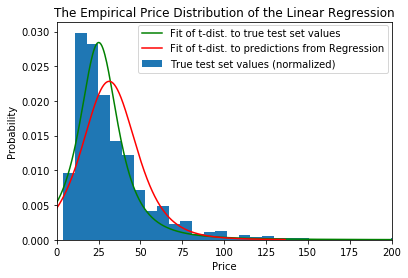

This is fitting a exponential-distribution to the Price data

Moments MVSK for the Real Data are as follows: 34.4150785400341 925.0770026605379 2.0 6.0
Moments MVSK are as follows: 34.35898571605823 2534.266536059316 2.0 6.0


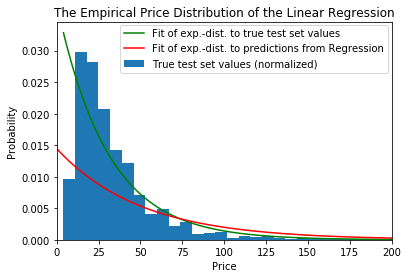

In [130]:
model = Wine_LinLstSq_Regression

print("This is fitting a t-distribution to the Price data")
print()
p1,p2,p3 = (scipy.stats.t.fit(y_test))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'g-',label='Fit of t-dist. to true test set values')
py.title('The Empirical Price Distribution of the Real Data')
p1,p2,p3 = (scipy.stats.t.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'r-',label='Fit of t-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Linear Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

print("This is fitting a exponential-distribution to the Price data")
print()
dfd, loc = (scipy.stats.expon.fit(y_test))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'g-',label='Fit of exp.-dist. to true test set values')
dfd, loc = (scipy.stats.expon.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'r-',label='Fit of exp.-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Linear Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

# Huber Regression

This is fitting a t-distribution to the Price data

Moments MVSK for the Real Data are as follows: 25.09446613601087 inf nan nan
Moments MVSK are as follows: 28.961891571918528 164.87681079369935 0.0 1.3497356921601693


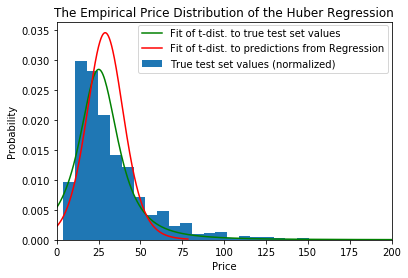

This is fitting a exponential-distribution to the Price data

Moments MVSK for the Real Data are as follows: 34.4150785400341 925.0770026605379 2.0 6.0
Moments MVSK are as follows: 29.64208866323298 1087.9534748665399 2.0 6.0


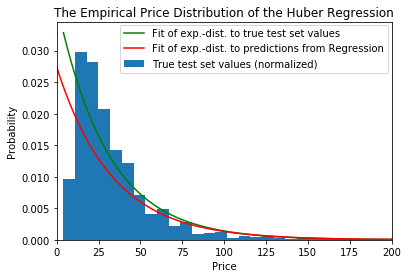

In [134]:
model = Wine_Huber_Linear_Regression

print("This is fitting a t-distribution to the Price data")
print()
p1,p2,p3 = (scipy.stats.t.fit(y_test))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'g-',label='Fit of t-dist. to true test set values')
py.title('The Empirical Price Distribution of the Real Data')
p1,p2,p3 = (scipy.stats.t.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'r-',label='Fit of t-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Huber Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

print("This is fitting a exponential-distribution to the Price data")
print()
dfd, loc = (scipy.stats.expon.fit(y_test))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'g-',label='Fit of exp.-dist. to true test set values')
dfd, loc = (scipy.stats.expon.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'r-',label='Fit of exp.-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Huber Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

# Decision Tree Regression

This is fitting a t-distribution to the Price data

Moments MVSK for the Real Data are as follows: 25.09446613601087 inf nan nan
Moments MVSK are as follows: 24.897886359703087 inf nan nan


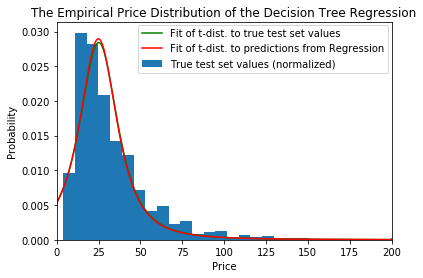

This is fitting a exponential-distribution to the Price data

Moments MVSK for the Real Data are as follows: 34.4150785400341 925.0770026605379 2.0 6.0
Moments MVSK are as follows: 34.38730864669965 923.3885268215691 2.0 6.0


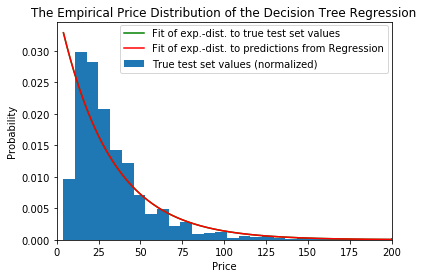

In [132]:
model = Wine_Decision_Tree_Regression

print("This is fitting a t-distribution to the Price data")
print()
p1,p2,p3 = (scipy.stats.t.fit(y_test))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'g-',label='Fit of t-dist. to true test set values')
py.title('The Empirical Price Distribution of the Real Data')
p1,p2,p3 = (scipy.stats.t.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'r-',label='Fit of t-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Decision Tree Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

print("This is fitting a exponential-distribution to the Price data")
print()
dfd, loc = (scipy.stats.expon.fit(y_test))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'g-',label='Fit of exp.-dist. to true test set values')
dfd, loc = (scipy.stats.expon.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'r-',label='Fit of exp.-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Decision Tree Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

# Random Forest Regression

This is fitting a t-distribution to the Price data

Moments MVSK for the Real Data are as follows: 25.09446613601087 inf nan nan
Moments MVSK are as follows: 26.135335926933184 3485.865869618067 nan nan


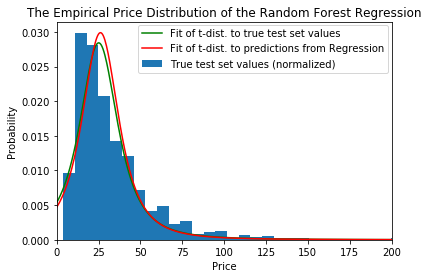

This is fitting a exponential-distribution to the Price data

Moments MVSK for the Real Data are as follows: 34.4150785400341 925.0770026605379 2.0 6.0
Moments MVSK are as follows: 34.34815458507927 837.9956538839087 2.0 6.0


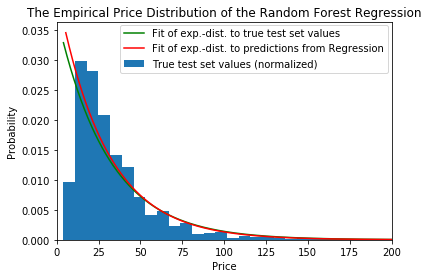

In [135]:
model = Wine_Random_Forest_Regression

print("This is fitting a t-distribution to the Price data")
print()
p1,p2,p3 = (scipy.stats.t.fit(y_test))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'g-',label='Fit of t-dist. to true test set values')
py.title('The Empirical Price Distribution of the Real Data')
p1,p2,p3 = (scipy.stats.t.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'r-',label='Fit of t-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Random Forest Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

print("This is fitting a exponential-distribution to the Price data")
print()
dfd, loc = (scipy.stats.expon.fit(y_test))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'g-',label='Fit of exp.-dist. to true test set values')
dfd, loc = (scipy.stats.expon.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'r-',label='Fit of exp.-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Random Forest Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

# Gradient Boosting Regression (Huber Loss)

This is fitting a t-distribution to the Price data

Moments MVSK for the Real Data are as follows: 25.09446613601087 inf nan nan
Moments MVSK are as follows: 27.361687492019847 349.78716682380656 nan nan


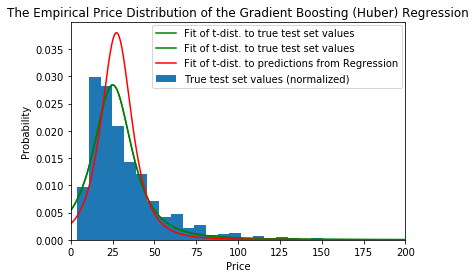

This is fitting a exponential-distribution to the Price data

Moments MVSK for the Real Data are as follows: 34.4150785400341 925.0770026605379 2.0 6.0
Moments MVSK are as follows: 31.573668700719573 476.5452723821282 2.0 6.0


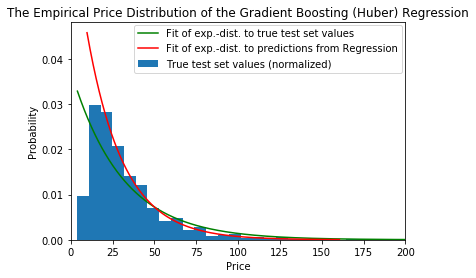

In [137]:
model = Wine_Huber_Tree_Regression

print("This is fitting a t-distribution to the Price data")
print()
p1,p2,p3 = (scipy.stats.t.fit(y_test))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'g-',label='Fit of t-dist. to true test set values')
py.title('The Empirical Price Distribution of the Real Data')
p1,p2,p3 = (scipy.stats.t.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'r-',label='Fit of t-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Gradient Boosting (Huber) Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

print("This is fitting a exponential-distribution to the Price data")
print()
dfd, loc = (scipy.stats.expon.fit(y_test))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'g-',label='Fit of exp.-dist. to true test set values')
dfd, loc = (scipy.stats.expon.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'r-',label='Fit of exp.-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Gradient Boosting (Huber) Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

# Gradient Boosting Regression (Least Squares Loss)

This is fitting a t-distribution to the Price data

Moments MVSK for the Real Data are as follows: 25.09446613601087 inf nan nan
Moments MVSK are as follows: 28.28160415270728 2416.4507106828287 nan nan


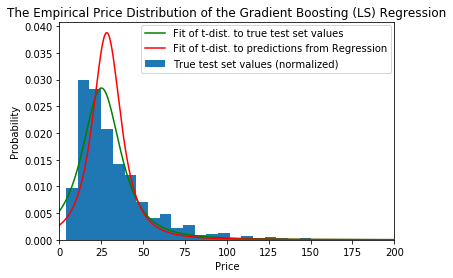

This is fitting a exponential-distribution to the Price data

Moments MVSK for the Real Data are as follows: 34.4150785400341 925.0770026605379 2.0 6.0
Moments MVSK are as follows: 34.7685463915336 429.37347602405947 2.0 6.0


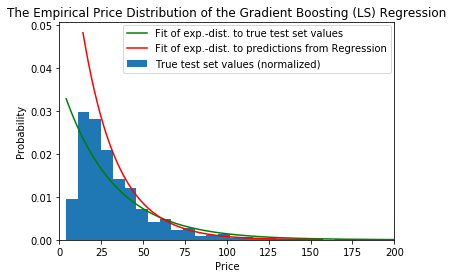

In [138]:
model = Wine_Ls_Tree_Regression

print("This is fitting a t-distribution to the Price data")
print()
p1,p2,p3 = (scipy.stats.t.fit(y_test))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'g-',label='Fit of t-dist. to true test set values')
py.title('The Empirical Price Distribution of the Real Data')
p1,p2,p3 = (scipy.stats.t.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.t.stats(p1,p2,p3,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.t.ppf(0.001, p1,p2,p3),scipy.stats.t.ppf(0.999, p1,p2,p3), 1000)
py.plot(x, scipy.stats.t.pdf(x, p1,p2,p3),'r-',label='Fit of t-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Gradient Boosting (LS) Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

print("This is fitting a exponential-distribution to the Price data")
print()
dfd, loc = (scipy.stats.expon.fit(y_test))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK for the Real Data are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'g-',label='Fit of exp.-dist. to true test set values')
dfd, loc = (scipy.stats.expon.fit(model(X_train, X_test, y_train)))
mean, var, skew, kurt = scipy.stats.expon.stats(dfd, loc,moments='mvsk')
print("Moments MVSK are as follows:",mean, var, skew, kurt)

x = np.linspace(scipy.stats.expon.ppf(0.001, dfd, loc),scipy.stats.expon.ppf(0.999, dfd, loc), 1000)
py.plot(x, scipy.stats.expon.pdf(x, dfd, loc),'r-',label='Fit of exp.-dist. to predictions from Regression')
py.hist(y_test,bins=200,normed=1,label='True test set values (normalized)')
py.title('The Empirical Price Distribution of the Gradient Boosting (LS) Regression')
py.xlim([0,200])
py.ylabel("Probability")
py.xlabel("Price")
py.legend(bbox_to_anchor=[.99,.99],loc=1,borderaxespad=0)
py.show()

# Write wine data to csv for use in julia and NLP